In [555]:
from WindPy import w
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [558]:
sns.set_style("whitegrid")
sns.set_context("talk")

In [31]:
STOCKS_DIR = "C:/Users/jgtzsx01/Documents/workspace/data/stocks"

In [3]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [429]:
def data_from_wind(symbol, start_date="1990-01-01", end_date="2017-02-06"):
    w.start()
    cols = ["open", "high", "low", "close", "amt"]
    raw_data = w.wsd(symbol, cols, beginTime=start_date, endTime=end_date)
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[str.lower(str(field))] = data
    df = pd.DataFrame(dic)
    df["date"] = pd.to_datetime(raw_data.Times)
    df["date"] = df["date"].map(lambda x: x.strftime('%Y-%m-%d'))
    df.dropna(subset=['close'], inplace=True)
    assert(df.shape[0] != 0)
    return df

# 1、钢铁与螺纹钢、铁矿石

In [119]:
stock_df = pd.read_csv("C:/Users/jgtzsx01/Documents/sheet/中信一级行业成分/钢铁.csv".decode('utf-8'))

In [121]:
# for symbol in stock_df["symbol"]:
#     df = data_from_wind(symbol)
#     df.to_csv("%s/%s.csv"%(STOCKS_DIR, symbol), index=False)

In [122]:
steel_bar = "RB01.SHF" # 螺纹钢

In [123]:
# df = data_from_wind(steel_bar)

In [124]:
# df.to_csv("../data/%s.csv"%(steel_bar), index=False)

In [137]:
df = pd.read_csv("../data/%s.csv"%(steel_bar))

In [138]:
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [139]:
values = df["close"]

In [140]:
stock_df[steel_bar] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, steel_bar] = beta

In [142]:
iron = "I01.DCE" # 铁矿石

In [143]:
# df = data_from_wind(iron)
# df.to_csv("../data/%s.csv"%(iron), index=False)

In [144]:
df = pd.read_csv("../data/%s.csv"%(iron))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [145]:
stock_df[iron] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, iron] = beta

In [146]:
stock_df

,symbol,name,RB01.SHF,I01.DCE
0,000408.SZ,*ST��Դ,0.284221,0.016636
1,000409.SZ,ɽ���ؿ�,0.232462,0.071326
2,000629.SZ,*ST����,0.314483,0.022536
3,000655.SZ,�����ҵ,0.543346,0.121822
4,000708.SZ,��ұ�ظ�,0.378040,0.026905
5,000709.SZ,�Ӹֹɷ�,0.379575,0.045484
6,000717.SZ,*ST�ظ�,0.343595,0.022412
7,000761.SZ,���ְ��,0.302276,0.016427
8,000778.SZ,��������,0.324775,0.040869
9,000825.SZ,̫�ֲ���,0.476476,0.080429


In [150]:
stock_df.to_csv("钢铁.csv".decode("utf-8"), index="False")

# 2、煤炭与动力煤、焦炭、焦煤

In [191]:
stock_df = pd.read_csv("C:/Users/jgtzsx01/Documents/sheet/中信一级行业成分/煤炭.csv".decode('utf-8'))

In [163]:
# for symbol in stock_df["symbol"]:
#     df = data_from_wind(symbol)
#     df.to_csv("%s/%s.csv"%(STOCKS_DIR, symbol), index=False)

In [423]:
coal = "ZC01.CZC" # 动力煤

In [431]:
df = data_from_wind(coal)
df.to_csv("../data/%s.csv"%(coal), index=False)

In [193]:
df = pd.read_csv("../data/%s.csv"%(coal))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [194]:
stock_df[coal] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, coal] = beta

In [195]:
coke = "J01.DCE"

In [196]:
# df = data_from_wind(coke)
# df.to_csv("../data/%s.csv"%(coke), index=False)

In [197]:
df = pd.read_csv("../data/%s.csv"%(coke))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [198]:
stock_df[coke] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, coke] = beta

In [200]:
cook_coal = "JM01.DCE"

In [201]:
# df = data_from_wind(cook_coal)
# df.to_csv("../data/%s.csv"%(cook_coal), index=False)

In [202]:
df = pd.read_csv("../data/%s.csv"%(cook_coal))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [203]:
stock_df[cook_coal] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, cook_coal] = beta

In [205]:
stock_df.to_csv("煤炭.csv".decode('utf-8'), index=False)

# 3、有色金属与沪金、沪银、沪铜、沪铝

In [208]:
stock_df = pd.read_csv("C:/Users/jgtzsx01/Documents/sheet/中信一级行业成分/有色金属.csv".decode('utf-8'))

In [212]:
# for symbol in stock_df["symbol"]:
#     df = data_from_wind(symbol)
#     if os.path.exists("%s/%s.csv"%(STOCKS_DIR, symbol)):
#         continue
#     print symbol
#     df.to_csv("%s/%s.csv"%(STOCKS_DIR, symbol), index=False)

In [213]:
au = "AU01.SHF"

In [214]:
# df = data_from_wind(au)
# df.to_csv("../data/%s.csv"%(au), index=False)

In [215]:
df = pd.read_csv("../data/%s.csv"%(au))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [216]:
stock_df[au] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, au] = beta

In [218]:
ag = "AG01.SHF"

In [219]:
df = data_from_wind(ag)
df.to_csv("../data/%s.csv"%(ag), index=False)

In [220]:
df = pd.read_csv("../data/%s.csv"%(ag))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [221]:
stock_df[ag] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, ag] = beta

In [223]:
cu = "CU01.SHF"

In [224]:
df = data_from_wind(cu)
df.to_csv("../data/%s.csv"%(cu), index=False)

In [225]:
df = pd.read_csv("../data/%s.csv"%(cu))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [226]:
stock_df[cu] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, cu] = beta

In [228]:
stock_df.to_csv("有色金属.csv".decode("utf-8"), index=False)

# 4、石油石化与布伦特原油

In [234]:
stock_df = pd.read_csv("C:/Users/jgtzsx01/Documents/sheet/中信一级行业成分/石油石化.csv".decode('utf-8'))

In [236]:
# for symbol in stock_df["symbol"]:
#     df = data_from_wind(symbol)
#     if os.path.exists("%s/%s.csv"%(STOCKS_DIR, symbol)):
#         continue
#     print symbol
#     df.to_csv("%s/%s.csv"%(STOCKS_DIR, symbol), index=False)

In [231]:
oil = 'SPGSBRTR.SPI'

In [232]:
# df = data_from_wind(oil)
# df.to_csv("../data/%s.csv"%(oil), index=False)

In [233]:
df = pd.read_csv("../data/%s.csv"%(oil))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [237]:
stock_df[oil] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, oil] = beta

In [239]:
stock_df.to_csv("石油石化.csv".decode('utf-8'), index=False)

# 5、农林牧渔与Wind农副产品、Wind谷物

In [240]:
stock_df = pd.read_csv("C:/Users/jgtzsx01/Documents/sheet/中信一级行业成分/农林牧渔.csv".decode('utf-8'))

In [241]:
for symbol in stock_df["symbol"]:
    df = data_from_wind(symbol)
    if os.path.exists("%s/%s.csv"%(STOCKS_DIR, symbol)):
        continue
    print symbol
    df.to_csv("%s/%s.csv"%(STOCKS_DIR, symbol), index=False)

In [242]:
agriculture = "APFI.WI"

In [243]:
# df = data_from_wind(agriculture)
# df.to_csv("../data/%s.csv"%(agriculture), index=False)

In [244]:
df = pd.read_csv("../data/%s.csv"%(agriculture))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [245]:
stock_df[agriculture] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, agriculture] = beta

In [246]:
corn = "CRFI.WI"

In [247]:
df = data_from_wind(corn)
df.to_csv("../data/%s.csv"%(corn), index=False)

In [248]:
df = pd.read_csv("../data/%s.csv"%(corn))
df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
values = df["close"]

In [249]:
stock_df[corn] = 0
for idx, symbol in enumerate(stock_df["symbol"]):
    df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, symbol))
    df.index = df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    prices = df.ix[values.index]["close"]
    
    prices.dropna(inplace=True)
    
    cov = np.cov(values.ix[prices.index].pct_change().dropna().values, prices.pct_change().dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    stock_df.loc[idx, corn] = beta

In [251]:
stock_df.to_csv("农林牧渔.csv".decode('utf-8'), index=False)

# 个股与期货相关性

In [464]:
stock_symbol = "600547.SH" # 山东黄金
future_symbol = "AU01.SHF" # 沪金连一
# future_symbol = "SPTAUUSDOZ.IDC" # 伦敦金现

In [465]:
stock_df = pd.read_csv("%s/%s.csv"%(STOCKS_DIR, stock_symbol))
future_df = pd.read_csv("../data/%s.csv"%(future_symbol))

In [466]:
stock_df.index = stock_df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
future_df.index = future_df["date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

### 只需要收盘价

In [467]:
stock_df = stock_df["close"].dropna()
future_df = future_df["close"].dropna()

In [468]:
stock_df = stock_df[stock_df.index >= future_df.index[0]]
future_df = future_df[future_df.index >= stock_df.index[0]]

### 开始时间

In [476]:
start_time = datetime.datetime(2016, 1, 1)
stock_df = stock_df[stock_df.index >= start_time]
future_df = future_df[future_df.index >= start_time]

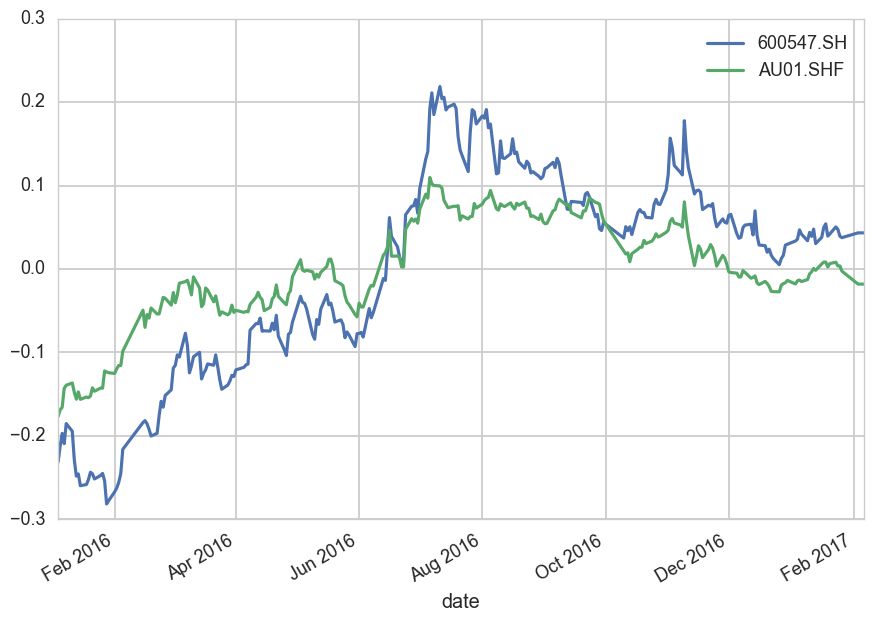

In [477]:
((stock_df - stock_df.mean()) / stock_df.var()).plot(label=stock_symbol)
((future_df - future_df.mean()) / future_df.var()).plot(label=future_symbol)
plt.legend()

### 计算beta

In [478]:
cov = np.cov(future_df.pct_change().dropna().values, stock_df.pct_change().dropna().values)
beta = cov[1, 0] / cov[0, 0]

In [479]:
beta

1.92490598924607

### correlation coefficient

In [480]:
np.corrcoef(future_df.pct_change().dropna().values, stock_df.pct_change().dropna().values)

array([[ 1.        ,  0.57629523],
       [ 0.57629523,  1.        ]])

### 收益率散点图

In [481]:
x = future_df.pct_change().dropna().values
y = stock_df.pct_change().dropna().values

In [482]:
df = pd.DataFrame({"future return": x, "stock return": y})

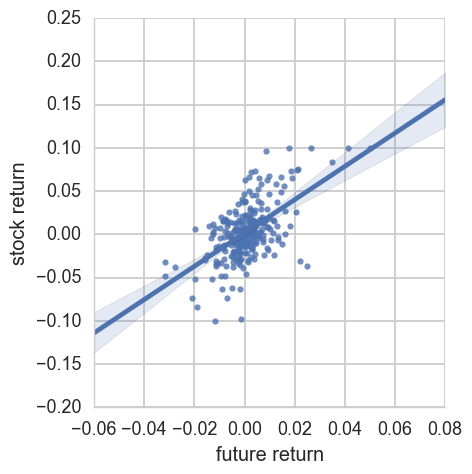

In [483]:
sns.lmplot(x="future return", y="stock return", data=df)

### 期货价格是否有预测性

In [484]:
x = future_df.pct_change().dropna().values
y = stock_df.pct_change().dropna().values

In [485]:
np.corrcoef(x[:-1], y[1:])

array([[ 1.       ,  0.0329141],
       [ 0.0329141,  1.       ]])

In [486]:
cov = np.cov(x[:-1], y[1:])
beta = cov[1, 0] / cov[0, 0]

In [487]:
beta

0.10920467745504339

In [488]:
df = pd.DataFrame({"future return": x[:-1], "stock return": y[1:]})

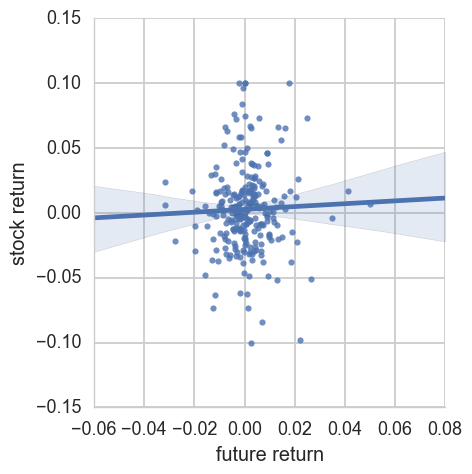

In [489]:
sns.lmplot(x="future return", y="stock return", data=df)

In [490]:
accuracy_score(x[:-1] > 0, y[1:] > 0)

0.52671755725190839

In [576]:
ran = 30
kx = range(-ran, ran+1)
arr = []
df = pd.DataFrame({"window": [], "lag": [], "beta": []})
for day in range(5, 90):
    dx, dy = x[-(day+ran):], y[-(day+ran):]
    ky = []
    for k in kx:
        ok = k
        if k < 0: # 滞后k天
            k = -k
            cov = np.cov(dx[k:], dy[:-k])
            beta = cov[1, 0] / cov[0, 0]
        elif k > 0: # 领先k天
            cov = np.cov(dx[:-k], dy[k:])
            beta = cov[1, 0] / cov[0, 0]
        else:
            cov = np.cov(dx, dy)
            beta = cov[1, 0] / cov[0, 0]
        ky.append(beta)
        df.ix[df.shape[0]] = [beta, ok, day]
    arr.append(ky)

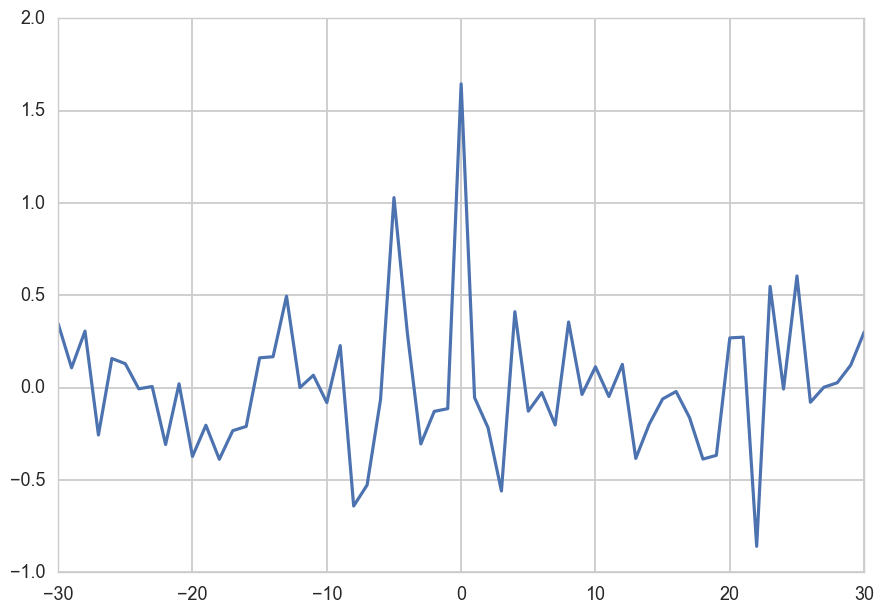

In [577]:
plt.plot(kx, arr[70])

In [578]:
df.head()

,beta,lag,window
0,1.536589,-30.0,5.0
1,2.950666,-29.0,5.0
2,-1.084741,-28.0,5.0
3,1.082207,-27.0,5.0
4,0.575668,-26.0,5.0


In [581]:
df["lag"] = df["lag"].astype(int)
df["window"] = df["window"].astype(int)

In [582]:
arr = df.pivot("window", "lag", "beta")

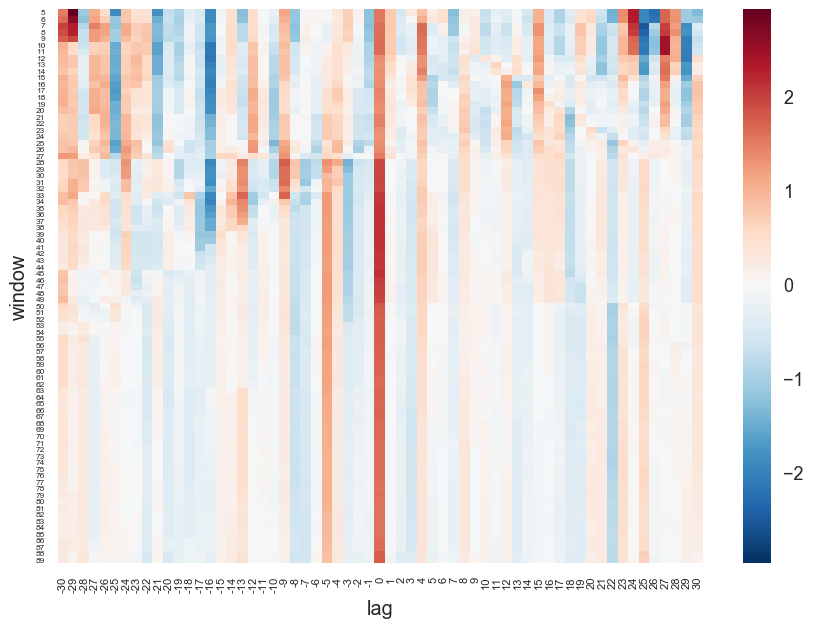

In [583]:
ax = sns.heatmap(arr)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(6)

### k日收益率

In [412]:
x = range(1, 301)
y = []
for k in x:
    cov = np.cov(future_df.pct_change(k).dropna().values, stock_df.pct_change(k).dropna().values)
    beta = cov[1, 0] / cov[0, 0]
    y.append(beta)

In [413]:
df = pd.DataFrame({"beta": y}, index=x)

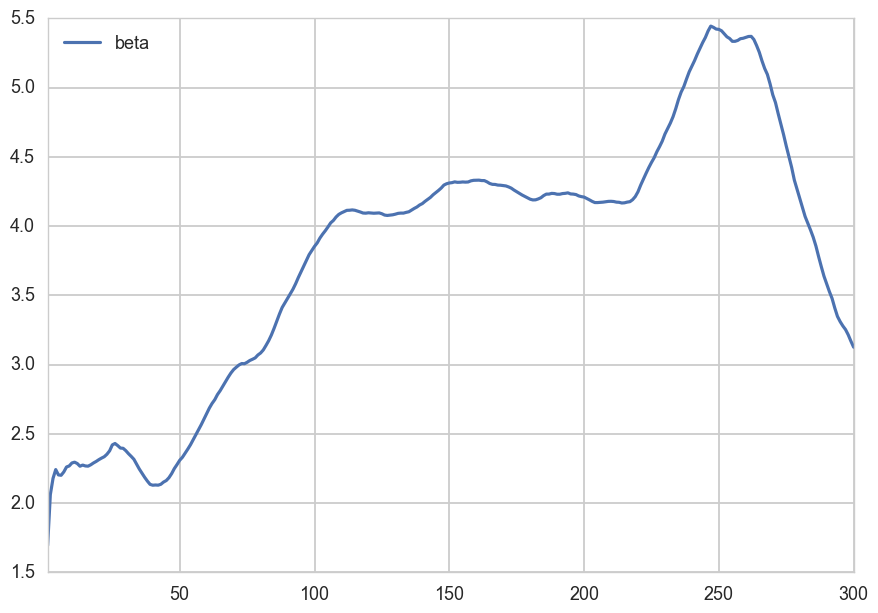

In [414]:
df.plot()

In [418]:
k = 247
x = future_df.pct_change(k).dropna().values
y = stock_df.pct_change(k).dropna().values

In [422]:
np.corrcoef(x, y)

array([[ 1.        ,  0.87677996],
       [ 0.87677996,  1.        ]])

In [419]:
df = pd.DataFrame({"future return": x, "stock return": y})

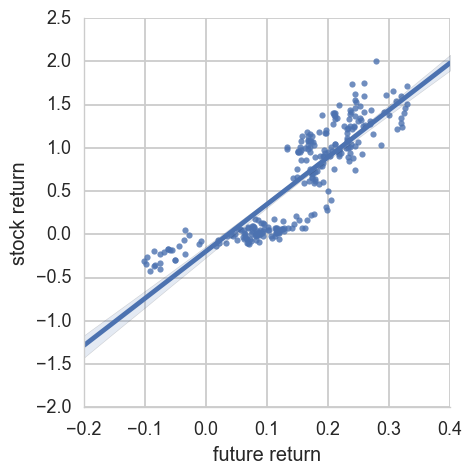

In [421]:
sns.lmplot(x="future return", y="stock return", data=df)